# Tasks

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Machine Learning Library
import sklearn
from sklearn import datasets  # If you need built-in datasets

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns  # Visualization library based on matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


### References

- `NumPy`: Fundamental package for numerical computations in Python. [Documentation](https://numpy.org/doc/)
- `Pandas`: Data manipulation and analysis library. [Documentation](https://pandas.pydata.org/docs/)
- `Matplotlib`: Plotting library for creating static, animated, and interactive visualizations. [Documentation](https://matplotlib.org/stable/contents.html)
- `Seaborn`: Statistical data visualization built on top of Matplotlib. [Documentation](https://seaborn.pydata.org/)
- `Scikit-learn`: Machine learning library for Python. [Documentation](https://scikit-learn.org/stable/documentation.html)


### Task 1: Source the Data Set

Import the Iris data set from the ``sklearn.datasets`` module.

Explain, in your own words, what the ``load_iris()`` function returns.

In [2]:

# Load the iris dataset.
df = pd.read_csv("https://gist.github.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

In [3]:
%%writefile -a analysis.py  

# Have a look.
df

Writing analysis.py


In [4]:
# Calculate the sum of the numbers from 1 to 10 inclusive.
sum = 0
for i in range(1, 11):
    sum += i
    print(sum)


1
3
6
10
15
21
28
36
45
55


### References

https://www.geeksforgeeks.org/python-basics-of-pandas-using-iris-dataset/

### Task 2: Explore the Data Structure
 Print and explain the shape of the data set, the first and last 5 rows of the data, the feature names, and the target classes.

In [5]:
# Describe the data set.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# look at the data.
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
# Look at the keys
df.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
# The species of iris
df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [9]:
# Shape
df['species'].shape

(150,)

In [10]:
# The sepal length
df['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [11]:
# The petal lenght
df['petal_length']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

In [12]:
# the petal width
df['petal_width']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

### References

https://www.geeksforgeeks.org/pandas-rename-column/

https://www.w3resource.com/pandas/dataframe/dataframe-describe.php

https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html

### Task 3: Summarize the Data
For each feature in the dataset, calculate and display:

- mean

- minimum

- maximum

- standard deviation

- median

In [13]:
# Statistics
stats = df.describe().T[['mean', 'min', 'max', 'std']]
stats['median'] = df.median(numeric_only=True)  # Select only the numeric columns

# Print results
print(stats)



                  mean  min  max       std  median
sepal_length  5.843333  4.3  7.9  0.828066    5.80
sepal_width   3.054000  2.0  4.4  0.433594    3.00
petal_length  3.758667  1.0  6.9  1.764420    4.35
petal_width   1.198667  0.1  2.5  0.763161    1.30


### References:

https://note.nkmk.me/en/python-pandas-describe/


### Task 4: Visualize Features
Plot histograms for each feature using *matplotlib*.
Add appropriate titles and axis labels.

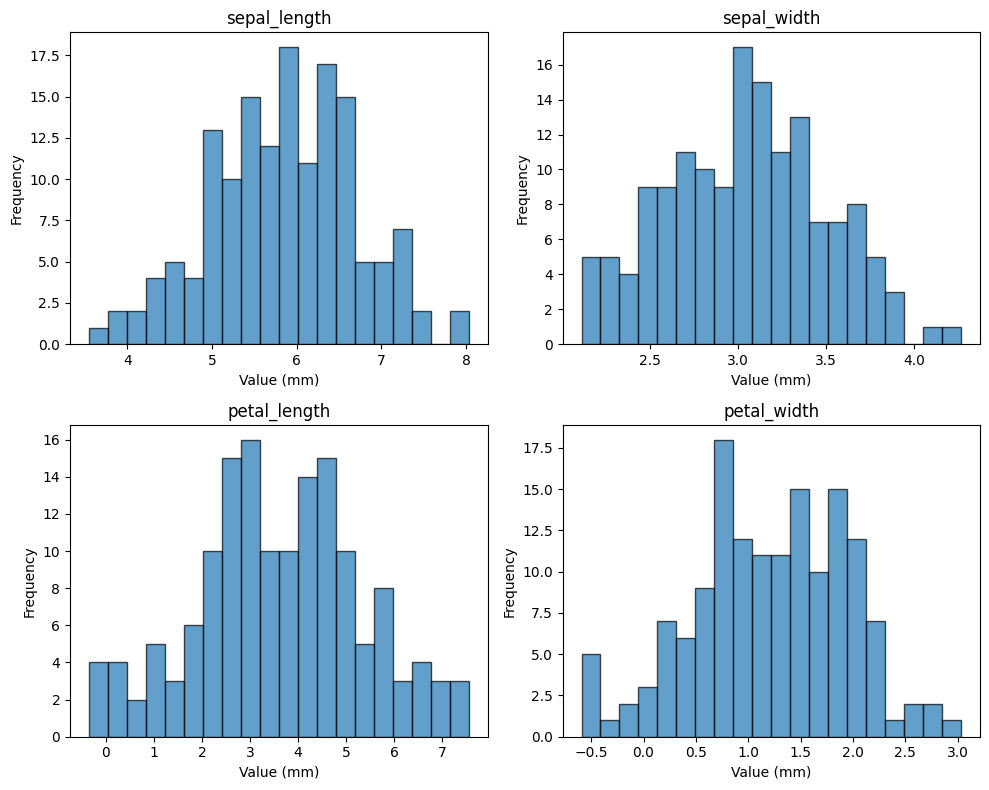

In [14]:


# Given summary statistics
data = {
    "sepal_length": np.random.normal(5.843333, 0.828066, 150),
    "sepal_width": np.random.normal(3.054000, 0.433594, 150),
    "petal_length": np.random.normal(3.758667, 1.764420, 150),
    "petal_width": np.random.normal(1.198667, 0.763161, 150)
}

# Plot histograms
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

# create histogram for each feature
for idx, (feature, values) in enumerate(data.items()):
    axes[idx].hist(values, bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_title(feature)
    axes[idx].set_xlabel("Value (mm)")
    axes[idx].set_ylabel("Frequency")

plt.tight_layout()
plt.show()



### References

https://sparkbyexamples.com/python/how-to-use-numpy-random-normal-in-python/

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html?utm_source=chatgpt.com

### Task 5: Investigate Relationships
Choose any two features from the data set and create a scatter plot of them.

Color-code the three different classes of the scatter plot points.

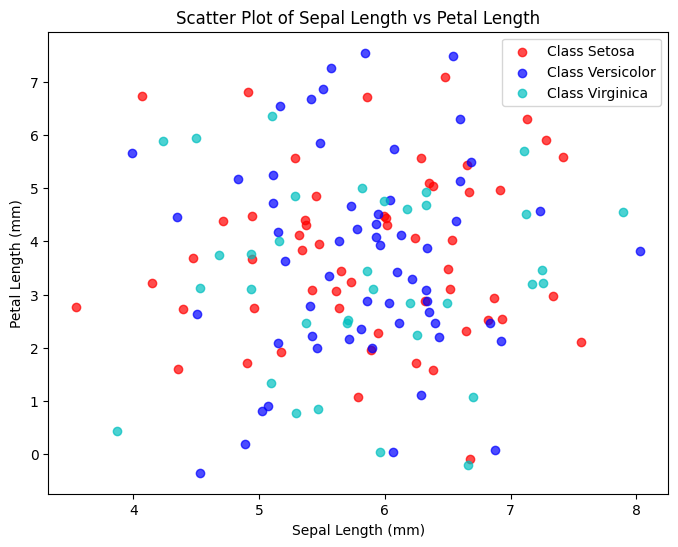

In [15]:



# Generate synthetic class labels with meaningful names
class_names = ["Setosa", "Versicolor", "Virginica"]
classes = np.random.choice(class_names, size=150)
colors = { "Setosa": "r", "Versicolor": "b", "Virginica": "c" }

# Scatter plot of sepal_length vs petal_length
plt.figure(figsize=(8, 6))
for class_label in np.unique(classes):
    plt.scatter(
        data["sepal_length"][classes == class_label],
        data["petal_length"][classes == class_label],
        color=colors[class_label],
        label=f'Class {class_label}',
        alpha=0.7
    )

# Add labels and legend
plt.xlabel("Sepal Length (mm)")
plt.ylabel("Petal Length (mm)")
plt.title("Scatter Plot of Sepal Length vs Petal Length")
plt.legend()
plt.show()

### References

https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html?utm_source=chatgpt.com

https://how2matplotlib.com/how-to-add-a-legend-to-a-scatter-plot-in-matplotlib.html

https://stackoverflow.com/questions/47006268/scatter-plot-with-color-label-and-legend-specified-by-c-option


### Task 6: Analyze Relationship
Use ``numpy.polyfit`` to add a regression line to the scatter plot from Task 5.

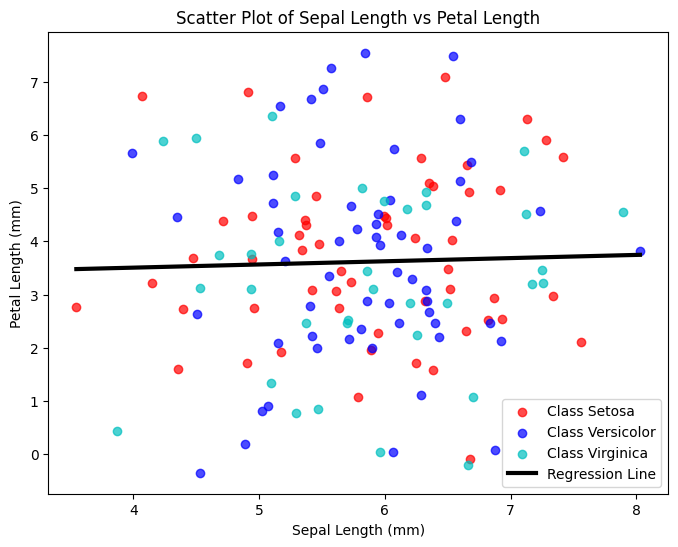

In [16]:

# Scatter plot of sepal_length vs petal_length
plt.figure(figsize=(8, 6))
for class_label in np.unique(classes):
    plt.scatter(
        data["sepal_length"][classes == class_label],
        data["petal_length"][classes == class_label],
        color=colors[class_label],
        label=f'Class {class_label}',
        alpha=0.7
    )

# Fit a regression line using numpy.polyfit
x = data["sepal_length"]
y = data["petal_length"]
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)

# Generate x and y values for the regression line
x_line = np.linspace(min(x), max(x), 100)
y_line = polynomial(x_line)

# Plot the regression line
plt.plot(x_line, y_line, color='k', linestyle='-', linewidth=3, label='Regression Line')

# Add labels, title, and legend
plt.xlabel("Sepal Length (mm)")
plt.ylabel("Petal Length (mm)")
plt.title("Scatter Plot of Sepal Length vs Petal Length")
plt.legend()
plt.show()


### References

https://sqlpey.com/python/how-to-implement-linear-regression-with-matplotlib-and-numpy/

https://www.geeksforgeeks.org/linear-regression-python-implementation/


### Task 7: Analyze Class Distributions
Create box-plots of the petal lengths for each of the three classes.

C:\Users\finia\AppData\Local\Temp\ipykernel_20676\2297232144.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(petal_lengths_by_class, labels=[f'Class {c}' for c in np.unique(classes)])


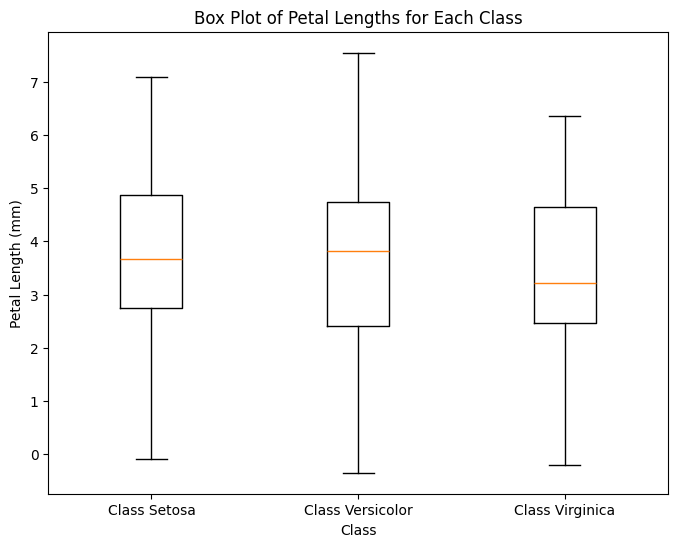

In [17]:
# Create box plots for petal lengths of each class
plt.figure(figsize=(8, 6))

# Extract petal lengths for each class
petal_lengths_by_class = [
    data["petal_length"][classes == class_label]
    for class_label in np.unique(classes)
]

# Create box plots
plt.boxplot(petal_lengths_by_class, labels=[f'Class {c}' for c in np.unique(classes)])

# Add labels and title
plt.xlabel("Class")
plt.ylabel("Petal Length (mm)")
plt.title("Box Plot of Petal Lengths for Each Class")
plt.show()


### References

https://www.geeksforgeeks.org/box-plot-and-histogram-exploration-on-iris-data/

https://www.geeksforgeeks.org/box-plot/

### Task 8: Compute Correlations
Calculate the correlation coefficients between the features.

Display the results as a heatmap using *matplotlib*.

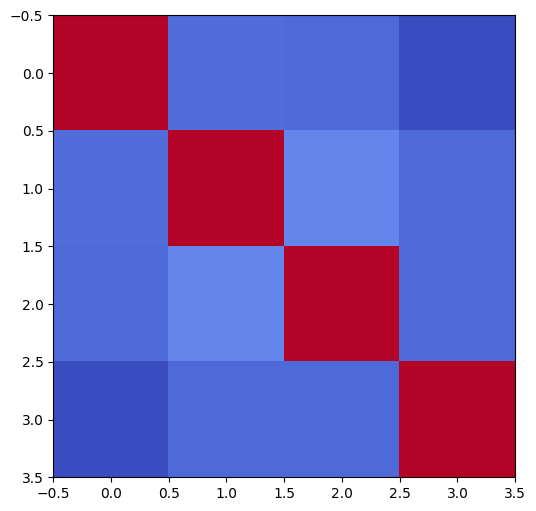

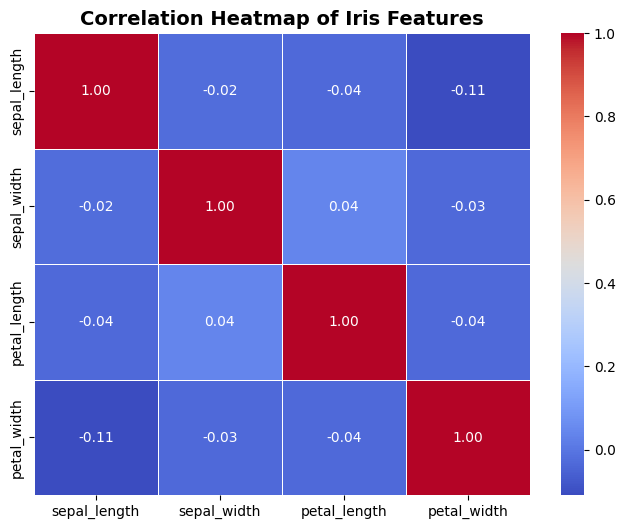

In [18]:
# Given summary statistics (simulated dataset)
np.random.seed(42)  # For reproducibility
data = {
    "sepal_length": np.random.normal(5.843333, 0.828066, 150),
    "sepal_width": np.random.normal(3.054000, 0.433594, 150),
    "petal_length": np.random.normal(3.758667, 1.764420, 150),
    "petal_width": np.random.normal(1.198667, 0.763161, 150)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Compute correlation matrix
correlation_matrix = df.corr()

## Plot heatmap using Matplotlib
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")

# Plot heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Iris Features", fontsize=14, fontweight='bold')

# Show plot
plt.show()


### References

https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/

https://pytutorial.com/python-seaborn-heatmap-tutorial-data-visualization/

https://www.pickl.ai/blog/exploring-what-is-pandas-dataframe-corr-method-types-and-working/

https://www.delftstack.com/howto/seaborn/correlation-heatplot-seaborn-python/

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

### Task 9: Fit a Simple Linear Regression
For your two features in Task 5, calculate the coefficient of determination 
R<sup>
2</sup>
.

Re-create the plot from Task 6 and annotate it with the 
R<sup>
2</sup>
 value.

In [19]:


# Reshape data for sklearn
X = data["sepal_length"].reshape(-1, 1)  # Independent variable
y = data["petal_length"]  # Dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Calculate R² score
r2 = r2_score(y, y_pred)

print(f"Coefficient of Determination (R²): {r2:.4f}")


Coefficient of Determination (R²): 0.0012


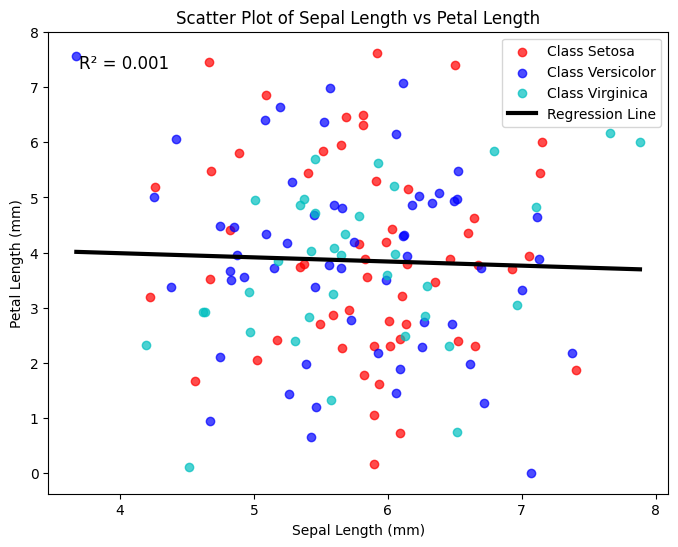

In [20]:


# Create a scatter plot
plt.figure(figsize=(8, 6))
for class_label in np.unique(classes):
    plt.scatter(
        data["sepal_length"][classes == class_label],
        data["petal_length"][classes == class_label],
        color=colors[class_label],
        label=f'Class {class_label}',
        alpha=0.7
    )

# Fit a regression line using numpy.polyfit
x = data["sepal_length"]
y = data["petal_length"]

# Fit a regression line
coefficients = np.polyfit(x, y, 1)

# Create a polynomial object
polynomial = np.poly1d(coefficients)
x_line = np.linspace(min(x), max(x), 100)
y_line = polynomial(x_line)

# Plot the regression line
plt.plot(x_line, y_line, color='k', linestyle='-', linewidth=3, label='Regression Line')

# Calculate R^2
y_pred = polynomial(x)
residuals = y - y_pred
ss_residual = np.sum(residuals ** 2)
ss_total = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Add labels, title, and R^2 annotation
plt.xlabel("Sepal Length (mm)")
plt.ylabel("Petal Length (mm)")
plt.title("Scatter Plot of Sepal Length vs Petal Length")
plt.legend()

# Annotate with R^2 value
plt.text(0.05, 0.95, f'R² = {r_squared:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show the plot
plt.show()


### References

https://sqlpey.com/python/how-to-implement-linear-regression-with-matplotlib-and-numpy/

https://www.geeksforgeeks.org/linear-regression-python-implementation/

https://stackoverflow.com/questions/63121785/make-a-r2-graph-with-python?utm_source=chatgpt.com

https://data36.com/linear-regression-in-python-numpy-polyfit/

### Task 10: Too Many Features
Use seaborn to create a pairplot of the data set.

Explain, in your own words, what the pairplot depicts.

KeyError: 'class'

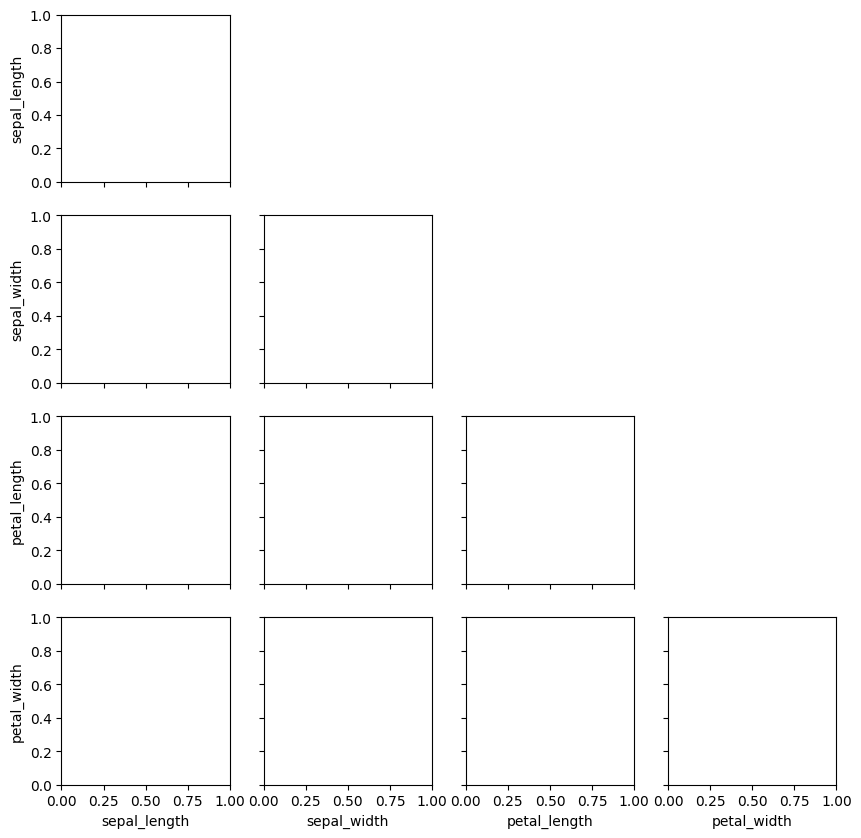

In [21]:
# Create a Seaborn pairplot
sns.pairplot(df, hue='class', diag_kind='hist', corner=True)
plt.suptitle("Pairplot of Iris-like Synthetic Dataset", y=1.02)
plt.show()

### References

https://pytutorial.com/python-seaborn-pairplot-visualize-data-relationships/

https://www.analyticsvidhya.com/blog/2024/02/pair-plots-in-machine-learning/

https://seaborn.pydata.org/generated/seaborn.pairplot.html

https://sparkbyexamples.com/pandas/pandas-check-if-a-column-exists-in-dataframe/

https://stackoverflow.com/questions/69420468/python-how-to-check-presence-of-a-column-in-dataframe-by-its-name-or-number

https://stackoverflow.com/questions/54805838/is-there-a-point-in-checking-if-a-column-exists-in-a-pandas-df


## End